In [15]:
%matplotlib inline
import numpy as np
import lmfit
import matplotlib.pyplot as plt

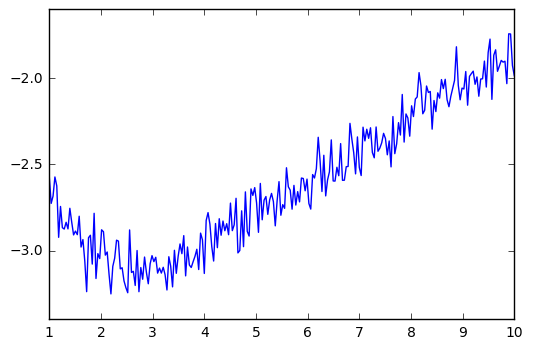

In [16]:
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0 * np.exp(-x / 2) - 5.0 * np.exp(-(x - 0.1) / 10.) + 0.1 * np.random.randn(len(x))
plt.plot(x, y)

In [17]:
p = lmfit.Parameters()
p.add('a1', value=3., min=0, max=10) 
p.add('a2', value=-4.)
p.add('t1', value=2.0, min=0, max=10) 
p.add('t2', value=3.)

def residual(p):
    a1=p['a1']
    a2=p['a2']
    t1=p['t1']
    t2=p['t2']
    model = a1*np.exp(-x/t1) + a2*np.exp(-(x-0.1)/t2)
    return model - y

In [18]:
mi = lmfit.minimize(residual, p, method='nelder')

[[Variables]]
    a1:   2.98621541 (init= 3)
    a2:  -4.33527265 (init=-4)
    t1:   1.30995253 (init= 2)
    t2:   11.8239987 (init= 3)
[[Correlations]] (unreported correlations are <  0.500)


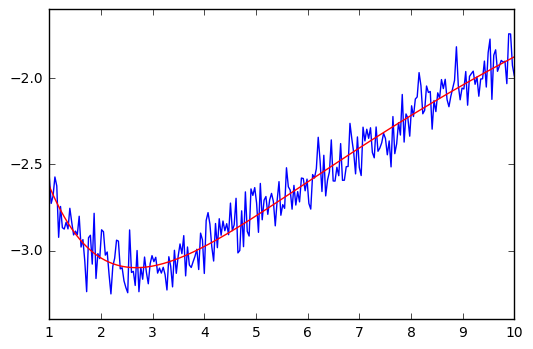

In [19]:
lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)
plt.plot(x, y)
plt.plot(x, residual(mi.params) + y, 'r')

In [20]:
mi.params

Parameters([('a1', <Parameter 'a1', 2.9862154100764169, bounds=[0:10]>),
            ('a2', <Parameter 'a2', -4.3352726532656245, bounds=[-inf:inf]>),
            ('t1', <Parameter 't1', 1.3099525328939421, bounds=[0:10]>),
            ('t2', <Parameter 't2', 11.823998764308943, bounds=[-inf:inf]>)])

In [21]:
mi.params.add('noise', value=1, min=0.001, max=2)

In [22]:
def lnprob(p):
    noise = p['noise']
    return -0.5 * np.sum((residual(p) / noise)**2 + np.log(2 * np.pi * noise**2))

In [25]:
mini = lmfit.Minimizer(lnprob, mi.params)

In [36]:
res = mini.emcee(burn=500, steps=1000, thin=30, params=mi.params, is_weighted=False)

In [33]:
import corner

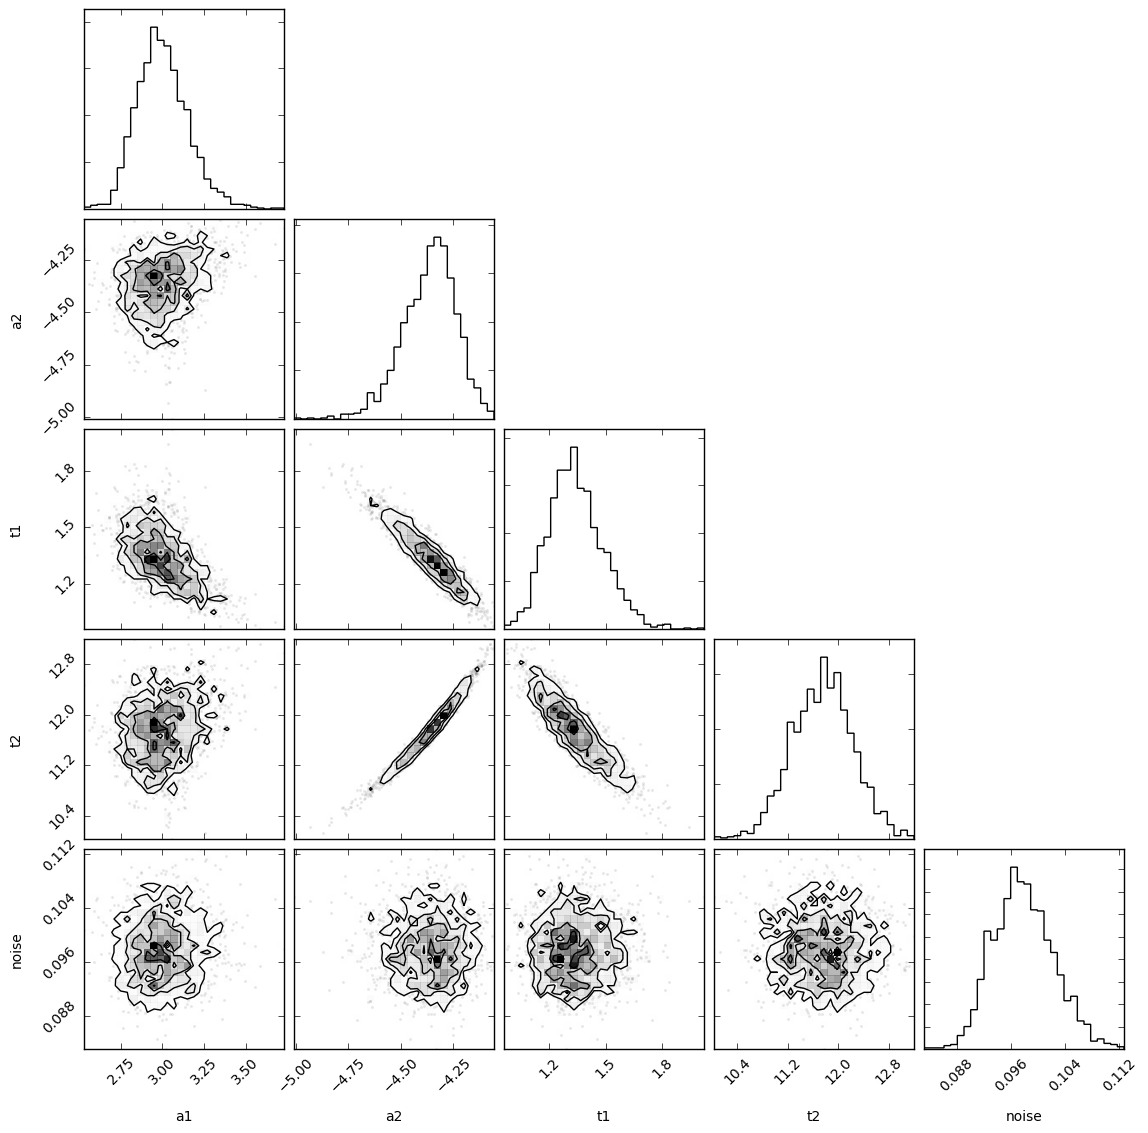

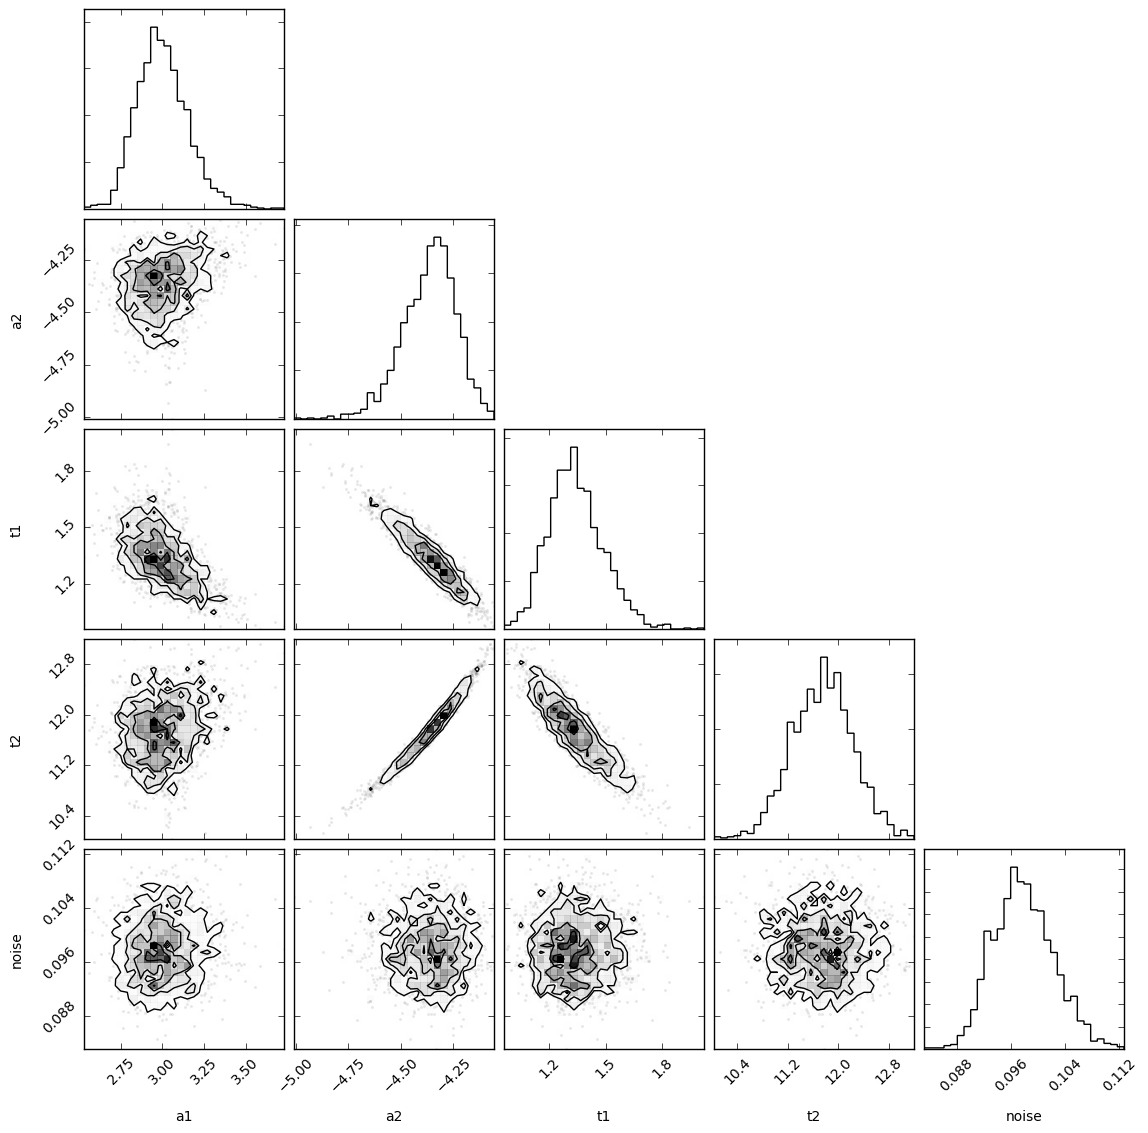

In [38]:
corner.corner(res.flatchain, bins=30, labels=res.var_names)